<div align="center"> <img src="https://matplotlib.org/_static/logo2.png" width="650"/> </div><br>

总结下Matplotlib中的动态绘图以及保存方法

Updated: 2019-06-17

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#动态绘图" data-toc-modified-id="动态绘图-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>动态绘图</a></span><ul class="toc-item"><li><span><a href="#FuncAnimation" data-toc-modified-id="FuncAnimation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><code>FuncAnimation</code></a></span><ul class="toc-item"><li><span><a href="#画线" data-toc-modified-id="画线-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>画线</a></span></li><li><span><a href="#衰减" data-toc-modified-id="衰减-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>衰减</a></span></li></ul></li><li><span><a href="#ArtistAnimation" data-toc-modified-id="ArtistAnimation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><code>ArtistAnimation</code></a></span></li></ul></li><li><span><a href="#保存为视频文件" data-toc-modified-id="保存为视频文件-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>保存为视频文件</a></span><ul class="toc-item"><li><span><a href="#使用writer进行保存" data-toc-modified-id="使用writer进行保存-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>使用<code>writer</code>进行保存</a></span></li><li><span><a href="#直接使用save方法保存" data-toc-modified-id="直接使用save方法保存-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>直接使用<code>save</code>方法保存</a></span></li></ul></li><li><span><a href="#雨滴可视化" data-toc-modified-id="雨滴可视化-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>雨滴可视化</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 动态绘图

由于本笔记在Jupyter环境下，使用HTML5渲染播放

## `FuncAnimation`

Makes an animation by repeatedly calling a function ``func``.

通过重复调用`func`中的代码，制作动态绘图。

```python
class matplotlib.animation.FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)   
```

- `fig` matplotlib fig对象
- `func` 动态绘图过程中不断调用的更新函数
- `frames` 作为 `func` 的第一个参数传入，iterable, int, generator function, or None，若为可迭代对象，则直接使用；若为整数，相当于`range(frames)`；若为生成器，需满足`def init_func() -> iterable_of_artists`
- `init_func` 绘制初始帧画面的函数
- `fargs` `func`的额外参数
- `save_count` 缓存frames中的多少帧
- `interval` **每帧之间的间隔，单位毫秒，例如`interval=50`则一秒可以输出20帧，故100帧输出动画时常5秒**
- `blit` **是否弃用blit优化，即更新所有点，还是仅更新产生变化的点，推荐选择`True`。**
- `repeat_delay` 若动态绘图结束后重复，延迟毫秒数，默认为None
- `repeat` 控制动态绘图结束后是否重复，默认为True

**动态绘图原理：`FuncAnimation`通过不断调用`func`，输出axes对象对绘图进行更新，并保存为动画从而实现动态绘图。具体而言，`frames`作为`func`的第一个位置参数输入（可以有额外参数），`func`返回一个包含多个axes对象（通常为一个）的tuple，循环往复。故定义`func`时应考虑frames这一输入参数。**

### 画线

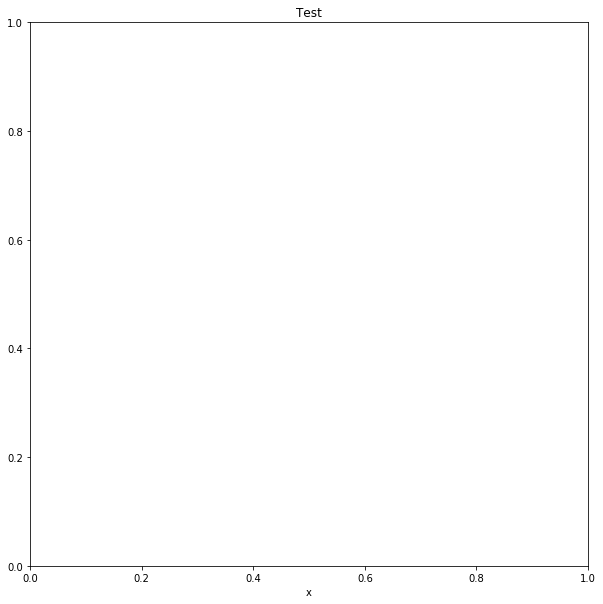

In [2]:
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,


fig = plt.figure(figsize=(10, 10))

data = np.random.rand(2, 1000)
l, = plt.plot([], [], 'r-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('Test')

line_ani = animation.FuncAnimation(
    fig, update_line, 100, fargs=(data, l), interval=50, blit=False)  # 100 对应FuncAnimation的frames参数，即对应update_line的num参数。(data, l)为update_line的额外参数

matplotlib.rc('animation', html='html5')
line_ani

### 衰减

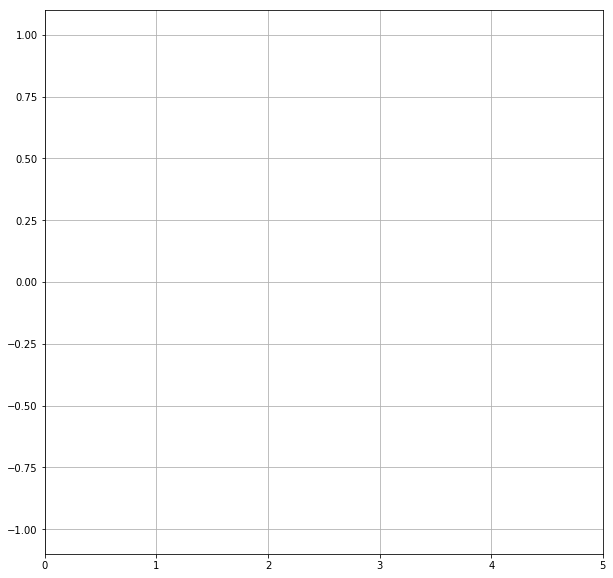

In [3]:
def data_gen(t=0):
    cnt = 0
    while cnt < 200:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 5)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,


fig, ax = plt.subplots(figsize=(10, 10))
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    # 动态更新 坐标轴大小
    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,


ani = animation.FuncAnimation(fig, run, list(data_gen()), interval=20, blit=False,
                              repeat=True, repeat_delay=100, init_func=init)  # 此处 data_gen 即对应函数的 frames 参数

matplotlib.rc('animation', html='html5')
ani

## `ArtistAnimation`

Animation using a fixed set of Artist objects.

给定一系列Artist对象，动态绘图

```python
class matplotlib.animation.ArtistAnimation(fig, artists, *args, **kwargs)
```

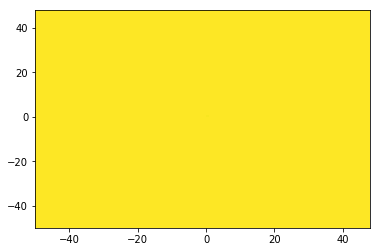

In [4]:
fig = plt.figure()

x = np.arange(-50, 49)
y = np.arange(-50, 49).reshape(-1, 1)
base = np.hypot(x, y)
ims = []

for add in np.arange(100):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 100)),))

im_ani = animation.ArtistAnimation(
    fig, ims, interval=50, repeat_delay=100, blit=True)

matplotlib.rc('animation', html='html5')
im_ani

# 保存为视频文件

**此时视频的FPS（多快）取决于`writer`的`fps`属性，而不由 `FuncAnimation`中的`internval`决定，`FuncAnimation`只能通过`frames`决定视频的长度（共有多少帧）**

**此时视频的FPS（多快）取决于`writer`的`fps`属性，而不由 `FuncAnimation`中的`internval`决定，`FuncAnimation`只能通过`frames`决定视频的长度（共有多少帧）**

**此时视频的FPS（多快）取决于`writer`的`fps`属性，而不由 `FuncAnimation`中的`internval`决定，`FuncAnimation`只能通过`frames`决定视频的长度（共有多少帧）**

## 使用`writer`进行保存

```python
Writer(fps=5, codec=None, bitrate=None, extra_args=None, metadata=None)
```

In [5]:
# 设置 writer
Writer = animation.writers['ffmpeg']
writer = Writer(fps=60, codec="h264", bitrate=-1, metadata=dict(dpi=300, artist='Me'))

ani.save('data/decay.mp4', writer=writer)

## 直接使用`save`方法保存

```python
save(
    ['filename', 'writer=None', 'fps=None', 'dpi=None', 'codec=None', 'bitrate=None', 'extra_args=None', 'metadata=None', 'extra_anim=None', 'savefig_kwargs=None'],
)
```

**推荐直接使用带具体参数的`save`函数，因为之前遇到过使用`writer`导致视频长度不确定的情况（原因未知）**

In [6]:
ani.save('data/decay_2.mp4',
         fps=60,
         dpi=300,
         bitrate=-1,
         codec="h264",
         extra_args=['-pix_fmt', 'yuv420p'],
         metadata={'artist': 'Me'},
         savefig_kwargs={'bbox_inches': 'tight'})

在动态绘图过程中使用`bbox_inches`参数可能会导致每一帧画面大小不统一，该参数被自动忽略

# 雨滴可视化

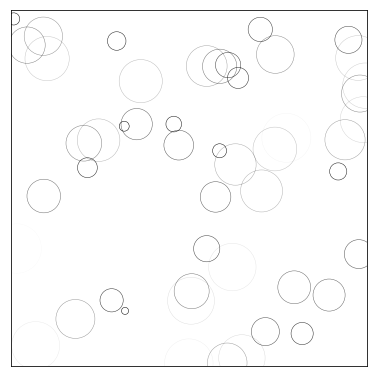

In [7]:
# 取消工具栏显示，Jupyter 环境不需要
# matplotlib.rcParams['toolbar'] = 'None'

fig = plt.figure(figsize=(5, 5), facecolor='white')

ax = fig.add_axes([0.005, 0.005, 0.990, 0.990], frameon=True, aspect=1)

# 雨滴数
n = 50
size_min = 50
size_max = 50*50

# 雨滴位置
P = np.random.uniform(0, 1, (n, 2))

# 雨滴外圈颜色
C = np.ones((n, 4)) * (0, 0, 0, 1)

# 最后一列为透明度，0为透明，1为不透明
C[:, 3] = np.linspace(0, 1, n)

# 雨滴大小
S = np.linspace(size_min, size_max, n)

scat = ax.scatter(P[:, 0], P[:, 1], s=S, lw=0.5,
                  edgecolors=C, facecolors='None')

# 保证坐标轴范围为 0-1，因为matplotlib默认会适当扩大坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# 取消ticks显示
ax.set_xticks([])
ax.set_yticks([])


def update(frame):
    global P, C, S

    # 每一步都令雨滴更加透明
    C[:, 3] = np.maximum(0, C[:, 3] - 1.0/n)

    # 每一步都令雨滴更大
    S += (size_max - size_min) / n

    # 根据frame重置部分雨滴
    i = frame % 50
    P[i] = np.random.uniform(0, 1, 2)
    S[i] = size_min
    C[i, 3] = 1

    # 更新 scatter 对象
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)
    return scat,


rain_ani = animation.FuncAnimation(fig, update, frames=200, interval=10)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=50, bitrate=-1, metadata=dict(dpi=300, artist='Me'))
rain_ani.save('data/rain.mp4', writer=writer)


matplotlib.rc('animation', html='html5')
rain_ani